In [46]:
#imports
import pandas as pd
import yfinance as yf
from datetime import date
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

In [47]:
ticker = 'NVDA'

data = yf.download(ticker, start = "2020-01-01", end = date.today())
data

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA
Date,,,,,
2020-01-02,5.972710,5.972710,5.893293,5.943831,237536000
2020-01-03,5.877113,5.920929,5.828068,5.852964,205384000
2020-01-06,5.901759,5.906987,5.757613,5.783754,262636000
2020-01-07,5.973208,6.019016,5.885078,5.930139,314856000
2020-01-08,5.984412,6.025739,5.928895,5.968977,277108000
...,...,...,...,...,...
2025-02-04,118.650002,121.199997,116.699997,116.959999,256550000
2025-02-05,124.830002,125.000000,120.760002,121.760002,262230800


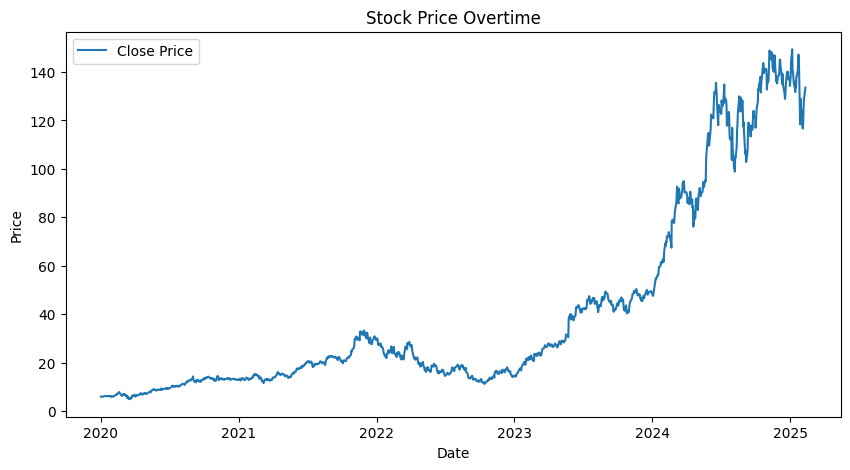

In [51]:

data[['Close']].dropna()

plt.figure(figsize = (10,5))
plt.plot(data['Close'],label = "Close Price")
plt.title("Stock Price Overtime")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()

Ticker
NVDA    14.520845
dtype: float64 Ticker
NVDA    4.892427
dtype: float64


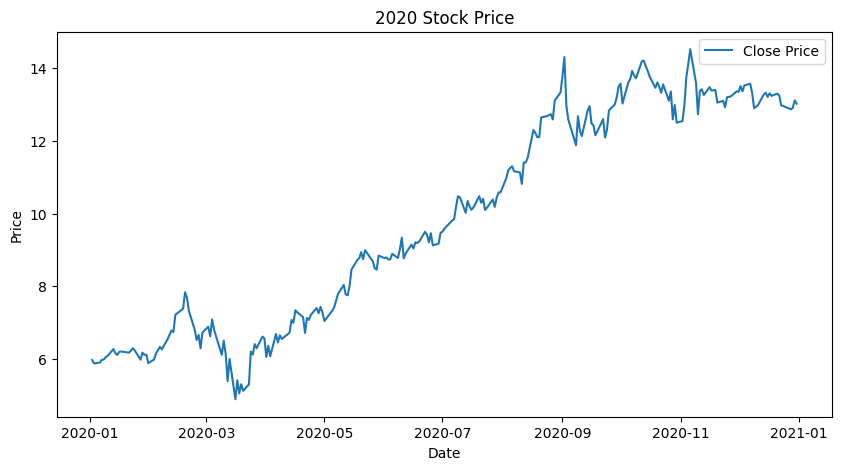

In [49]:
data2020 = data.loc['2020-01-01' : '2020-12-31']
plt.figure(figsize = (10,5))
plt.plot(data2020['Close'], label = 'Close Price')
plt.title("2020 Stock Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
max2020 = data2020['Close'].max()
min2020 = data2020['Close'].min()
print(max2020,min2020)

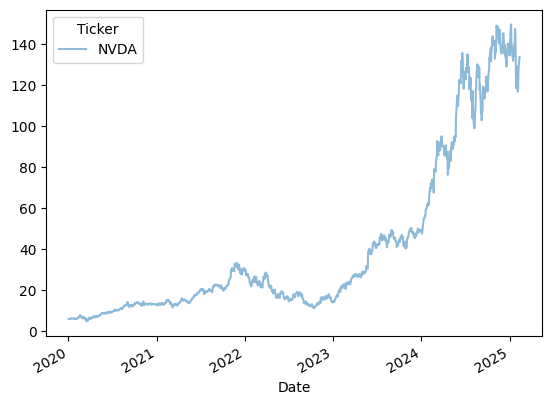

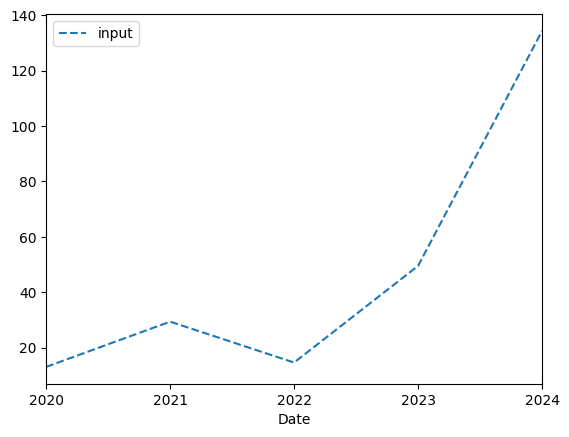

In [66]:
data['Close'].plot(alpha=0.5, style='-')
data['Close'].asfreq('BYE').plot(style='--');
plt.legend(['input','asfreq'],loc = 'upper left')

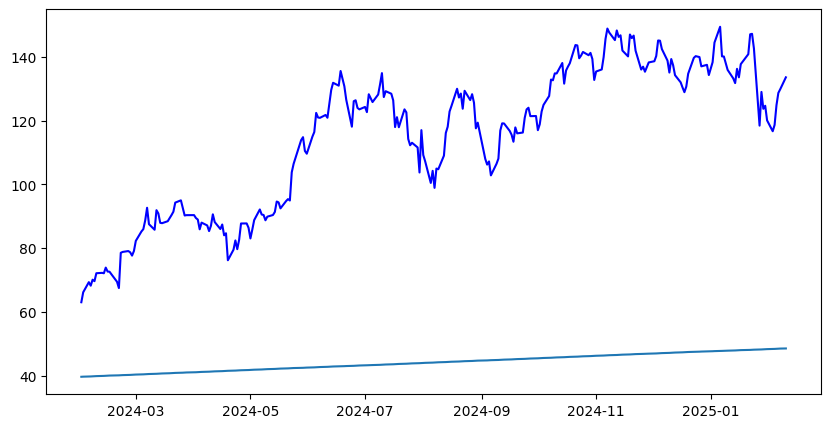

In [69]:
# Prepare data
data['Days'] = np.arange(len(data))  # Convert date to numerical values

X = data[['Days']]
y = data['Close']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
predictions = model.predict(X_test)

# Plot actual vs predicted
plt.figure(figsize=(10,5))
plt.plot(y_test.index, y_test, label="Actual Price", color='blue')
plt.plot(y_test.index, predictions)
